**GRIP - The Sparks Foundation**

**Data Science & Business Analytics**

**Intern: Dev Das**

**TASK-1 Prediction using Supervised Learning**

**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



In [48]:
# Import required libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Reding data from remote link- provided by TSF
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
print(s_data)

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [9]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


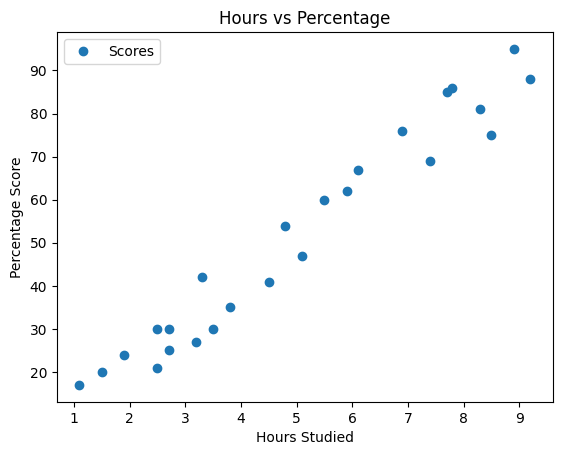

In [11]:
# Plotting the distribution of score
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [6]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Preparing the data**

The next step is to divide the data into attributes as a Input and labels as Outputs

In [14]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

Here We'll Split this data into training and test sets using Scikit-Learn's build-in train_test_split() method.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Completed ")

Training Completed 


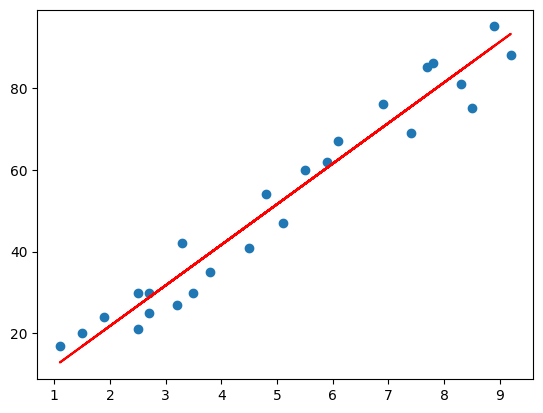

In [20]:
# Plotting the regration line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, 'r');
plt.show()

**Making Predictions**


In [21]:
# Testing data in Hours and Predicting the scores
print(X_test)
y_pred = regressor.predict(X_test) 


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [40]:
# Compare Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [56]:
# Predicted score if a student studies for 9.25 Hours per Day
hours = np.array([9.25]).reshape(-1, 1)  # Reshape to a 2D array with one feature
predicted_score = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(predicted_score))

No of Hours = 9.25
Predicted Score = [93.69173249]


**Evaluating the model**

The final step is to evaluate the performance of algorithm.

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
